In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
data=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [40]:
categoricals = data.select_dtypes(np.object)
categoricals = categoricals.drop("Customer",axis=1)

categoricals.head()

/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_64974/2945686947.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


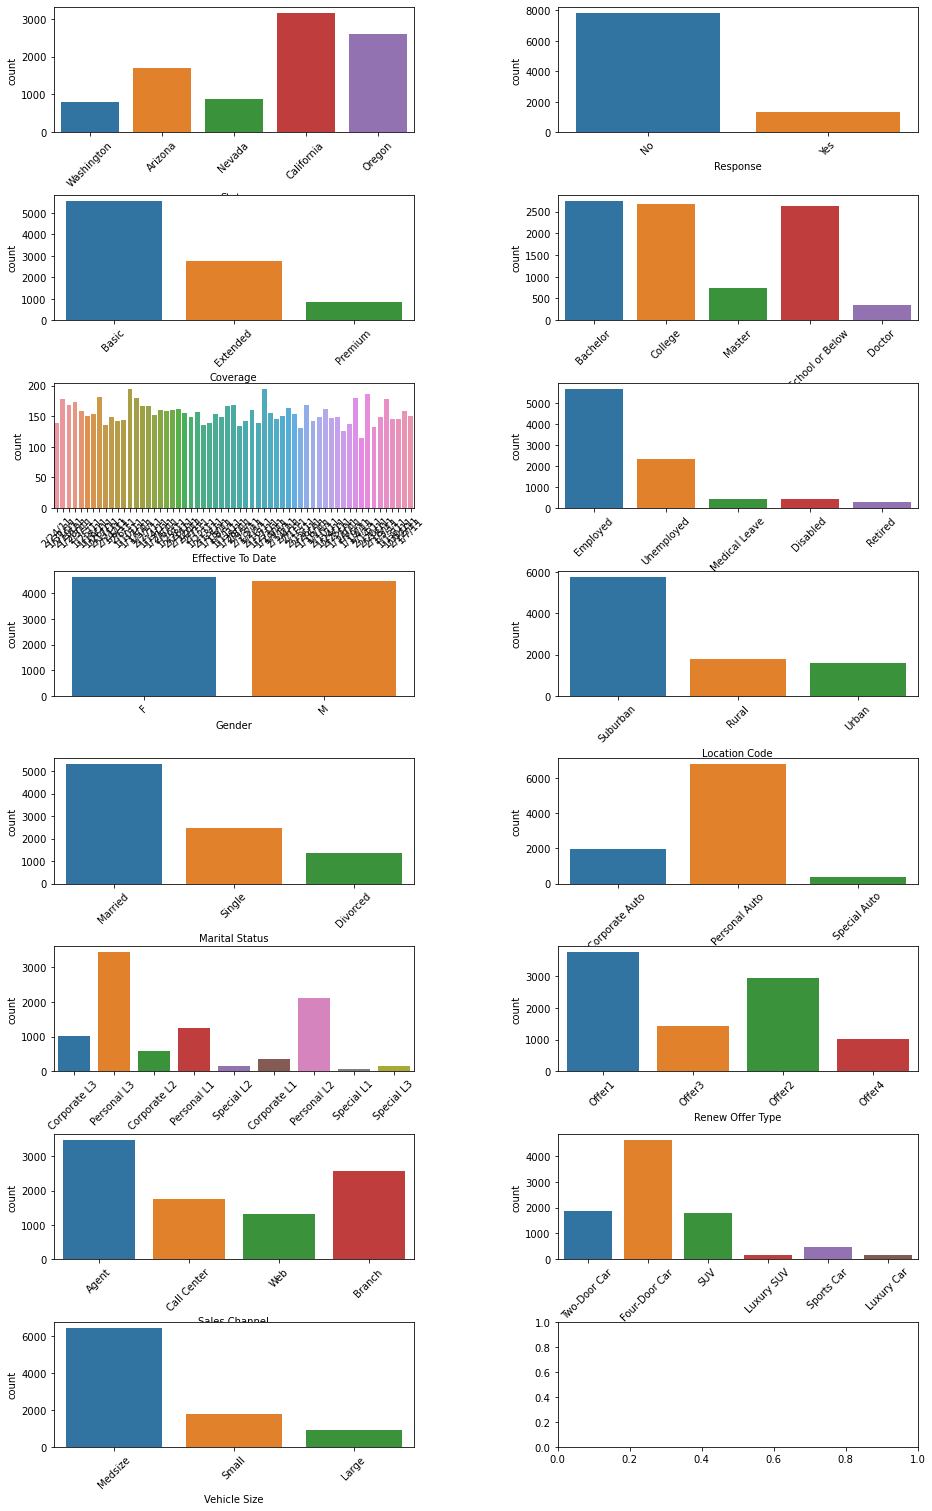

In [41]:
def plot_cat(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/2)),2 ,figsize=(15,25))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    j=0
    k=0
    for i in range(len(col)):
        chart=sns.countplot(x=df[col[i]],data=df,ax=ax[j,k])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        k=k+1
        if k>=2:
            j=j+1
            k=0
plot_cat(categoricals)

In [42]:
# Change effective to date column to datetime format.
import time
from datetime import date
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])
categoricals['Effective To Date'] = categoricals['Effective To Date'].dt.weekday


In [43]:
#Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
display(categoricals['Policy Type'].value_counts())
display(categoricals['Policy'].value_counts())
# personal Auto: is sum of Personal L3,L2, L1
#Corporate Auto: is sum Corporate L3,l2,l1
# special Auto : is sum special L3,l2,l1
# so detele the policy
categoricals=categoricals.drop('Policy',axis=1)
categoricals

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,3,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,0,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,5,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,3,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,3,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,3,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,5,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,6,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,3,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


In [46]:
# Change Covrege to orinals so we could consider it as numerical
def coverage(x):
    if x =="Basic":
        return 0
    elif x =="Extended":
        return 1
    else:
        return 2
categoricals['Coverage']=categoricals['Coverage'].apply(coverage)
categoricals['Coverage'].value_counts()

# so we put coverage in Numerical Data Frame

0    5568
1    2742
2     824
Name: Coverage, dtype: int64

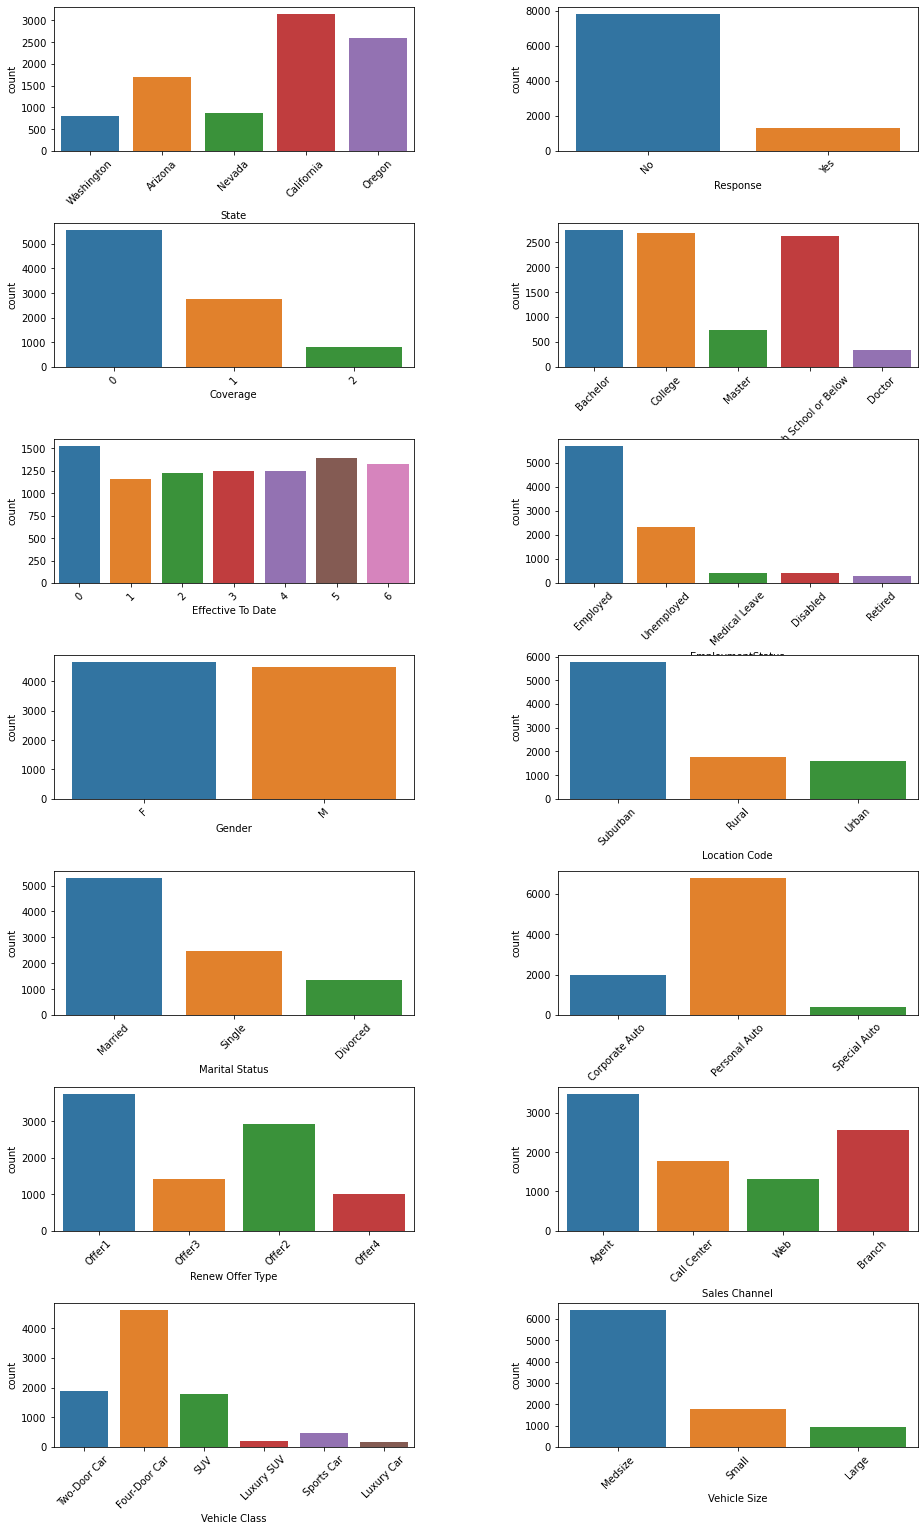

In [47]:
plot_cat(categoricals)